In [1]:
import numpy as np
import matplotlib.pyplot as plt

#set parameters
DT = 0.05
DX = 1
por = 0.3
Cf = 100.0
Cb = 0.0
Ci = 0.0
DH = 2.5
q = 1.5

L = 50
Tmax = 5
N = int(L / DX) + 1

node_locations = np.arange(0, L + DX, DX)
number_timesteps = int(Tmax / DT)
time_increments = np.arange(DT, Tmax + DT, DT)
Cold = np.zeros(N) * Ci
Cnew = np.zeros(N)
Cold[0] = Cf
Cnew = Cold

#set coefficients in in FD equations
p = (DH * DT) / (por * DX**2)
r = (q * DT) / (2 * por * DX)

a = p - r
b = 2 * por + 2 * p
c = p + r


for i in time_increments:
    Cnew[0] = Cf  # Boundary condition on the left
    Cnew[50] = Cb  # Boundary condition on the right
    
    D = np.zeros(N + 1)
    E = np.zeros(N + 1)
    F = np.zeros(N + 1)

    for k in range(1, N-1):
        if k == 1:
            D[k] = a * Cold[k+1] + (4 * por - b) * Cold[k] + c * Cold[k-1]
            E[k] = a / b
            F[k] = (D[k] + c * Cnew[k - 1]) / b
        else:
            D[k] = a * Cold[k+1] + (4 * por - b) * Cold[k] + c * Cold[k-1]
            E[k] = a / (b - c * E[k-1])
            F[k]= (D[k] + c * F[k-1]) / (b - c * E[k-1])
    
    for k in range(N - 2, 0, -1):
        Cnew[k] = F[k] + E[k] * Cnew[k+1]

print(Cnew)

[100.          99.99999936  99.99999828  99.99999651  99.99999373
  99.99998948  99.99998313  99.99997379  99.99996024  99.99994085
  99.99991338  99.99987486  99.99982135  99.9997476   99.99964677
  99.99950991  99.9993254   99.99907828  99.99874937  99.99831421
  99.99774179  99.99699299  99.9960187   99.99475756  99.9931332
  99.99105091  99.98839349  99.98501597  99.98073873  99.97533794
  99.96853153  99.95995752  99.94913846  99.93542052  99.91786597
  99.89505922  99.86475188  99.82320824  99.76399239  99.6757146
  99.53783863  99.31287696  98.9318595   98.26728091  97.08274543
  94.93925904  91.02088659  83.81046337  70.48652935  45.80205169
   0.        ]


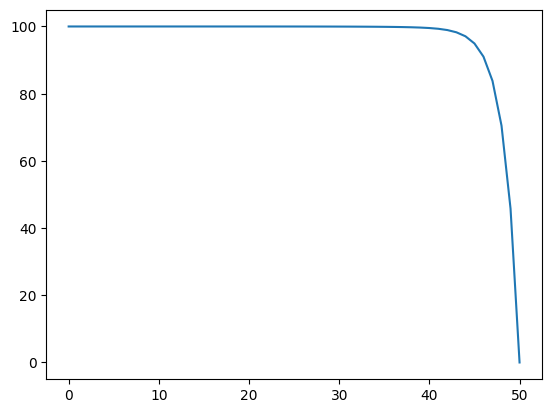

In [2]:
plt.plot(Cnew)